VISUALISASI

In [53]:
# Deklarasi library yang digunakan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder

import pickle

In [54]:
# memanggil dataset
dataset = pd.read_csv('merc.csv')

# deskripsi dataset
print("Data dataset")
dataset.head(5)

Data dataset


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,SLK,2005,5200,Automatic,63000,Petrol,325,32.1,1.8
1,S Class,2017,34948,Automatic,27000,Hybrid,20,61.4,2.1
2,SL CLASS,2016,49948,Automatic,6200,Petrol,555,28.0,5.5
3,G Class,2016,61948,Automatic,16000,Petrol,325,30.4,4.0
4,G Class,2016,73948,Automatic,4000,Petrol,325,30.1,4.0


<Axes: >

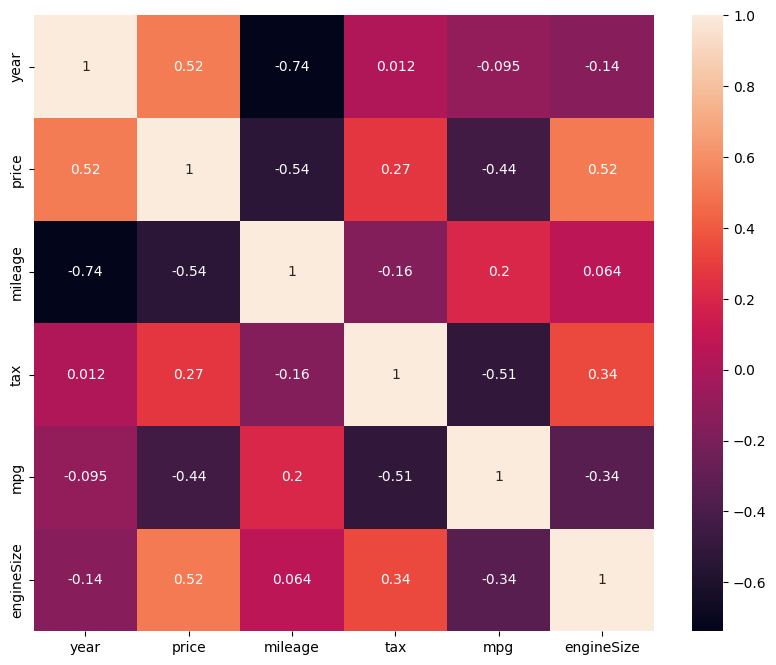

In [55]:
# visualisasi dataset
numeric_columns = dataset.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_columns.corr(), annot=True)


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26],
 [Text(0, 0, ' C Class'),
  Text(1, 0, ' A Class'),
  Text(2, 0, ' E Class'),
  Text(3, 0, ' GLC Class'),
  Text(4, 0, ' GLA Class'),
  Text(5, 0, ' B Class'),
  Text(6, 0, ' CL Class'),
  Text(7, 0, ' GLE Class'),
  Text(8, 0, ' SL CLASS'),
  Text(9, 0, ' CLS Class'),
  Text(10, 0, ' V Class'),
  Text(11, 0, ' S Class'),
  Text(12, 0, ' GL Class'),
  Text(13, 0, ' SLK'),
  Text(14, 0, ' CLA Class'),
  Text(15, 0, ' X-CLASS'),
  Text(16, 0, ' M Class'),
  Text(17, 0, ' GLS Class'),
  Text(18, 0, ' GLB Class'),
  Text(19, 0, ' G Class'),
  Text(20, 0, ' CLK'),
  Text(21, 0, ' CLC Class'),
  Text(22, 0, ' R Class'),
  Text(23, 0, '180'),
  Text(24, 0, '200'),
  Text(25, 0, '220'),
  Text(26, 0, '230')])

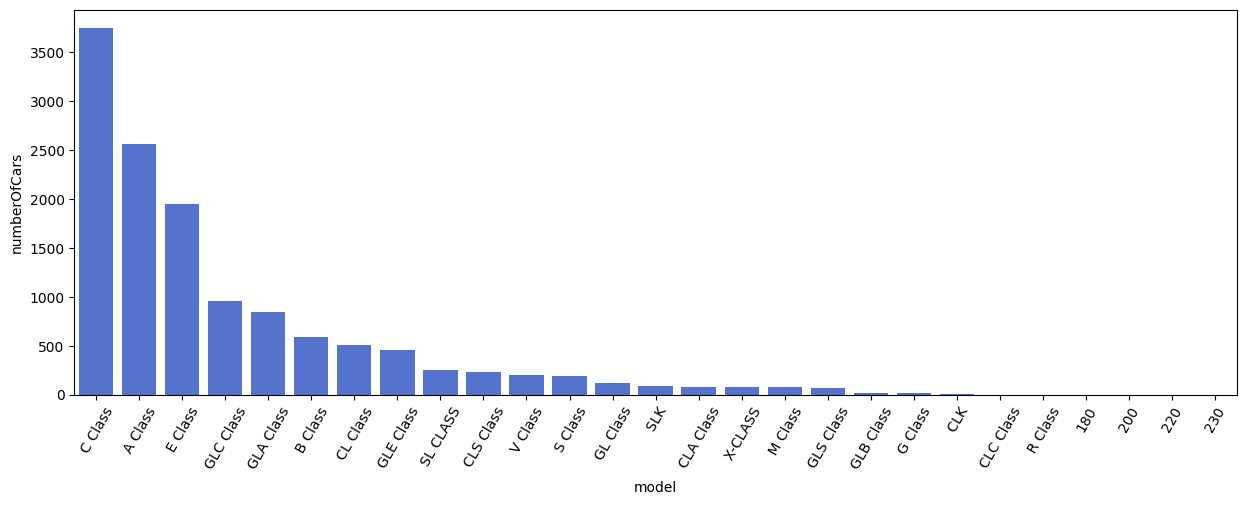

In [56]:
# plot berdasarkan models
models = dataset.groupby('model').count()[['tax']].sort_values(by="tax", ascending=False).reset_index()
models = models.rename(columns={'tax':'numberOfCars'})

fig = plt.figure(figsize=(15,5))
sns.barplot(x=models['model'], y=models['numberOfCars'], color='royalblue')
plt.xticks(rotation=60)

<Axes: xlabel='engineSize', ylabel='count'>

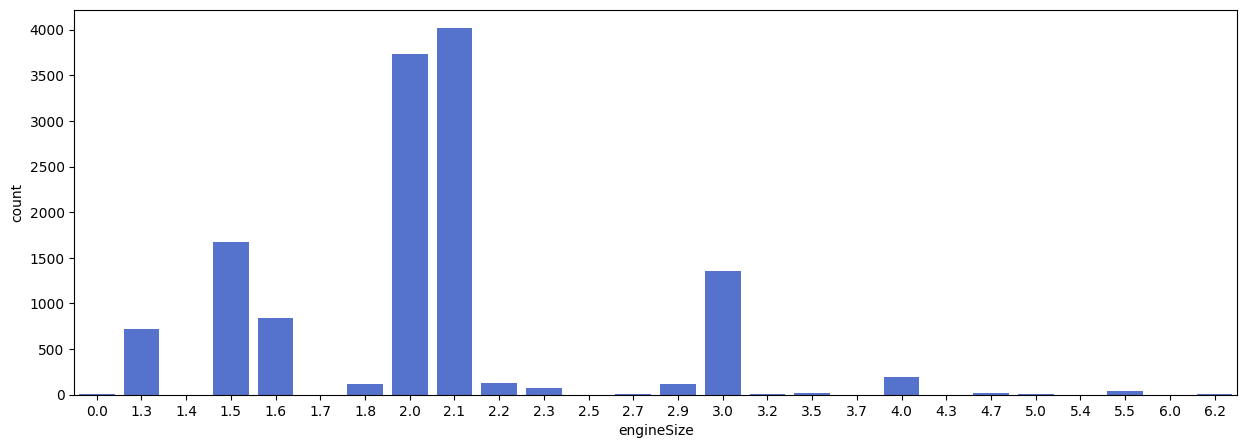

In [57]:
# plot berdasrakan mesin
engine = dataset.groupby('engineSize').count()[['tax']].sort_values(by="tax", ascending=False).reset_index()
engine = engine.rename(columns={'tax':'count'})

plt.figure(figsize=(15,5))
sns.barplot(x=engine['engineSize'], y=engine['count'], color='royalblue')

<Figure size 1500x500 with 0 Axes>

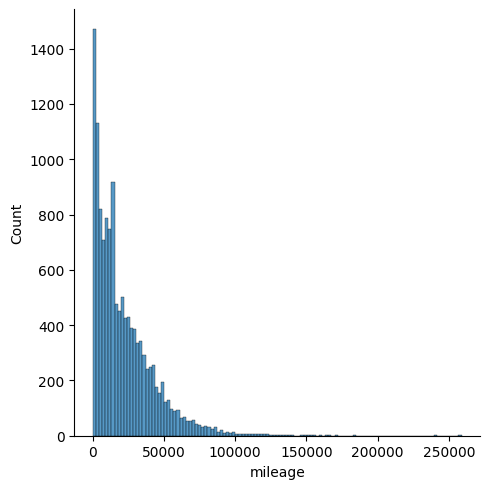

In [58]:
# distribusi mileage
plt.figure(figsize=(15,5))
sns.displot(dataset['mileage'])

<Figure size 1500x500 with 0 Axes>

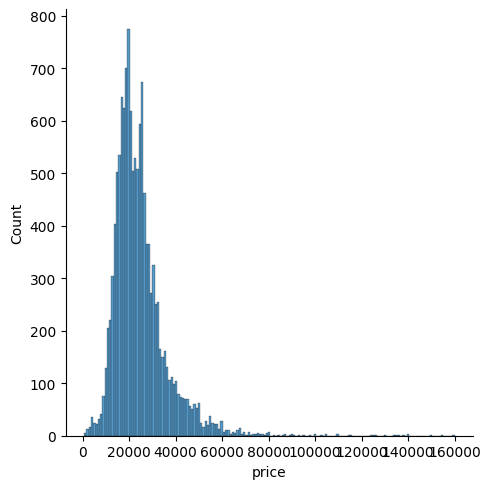

In [59]:
# distribusi harga mobil
plt.figure(figsize=(15,5))
sns.displot(dataset['price'])

In [60]:
# Deklarasi library yang digunakan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder

import pickle
dataset = pd.read_csv('merc.csv')

SELEKSI FEATURES

In [61]:
def preprocess_data(data):
    # Encode categorical features
    le = LabelEncoder()
    
    data['model'] = le.fit_transform(data['model'])
    data['transmission'] = le.fit_transform(data['transmission'])
    data['fuelType'] = le.fit_transform(data['fuelType'])
    
    return data

dataset = preprocess_data(dataset)

In [62]:
# seleksi features
features = ['model', 'year','mileage', 'mpg', 'engineSize']
x = dataset[features]
y = dataset['price']
x.shape, y.shape

((13119, 5), (13119,))

In [63]:
# supervised learning
# split data dan data testing
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=70)
y_test.shape

(3280,)

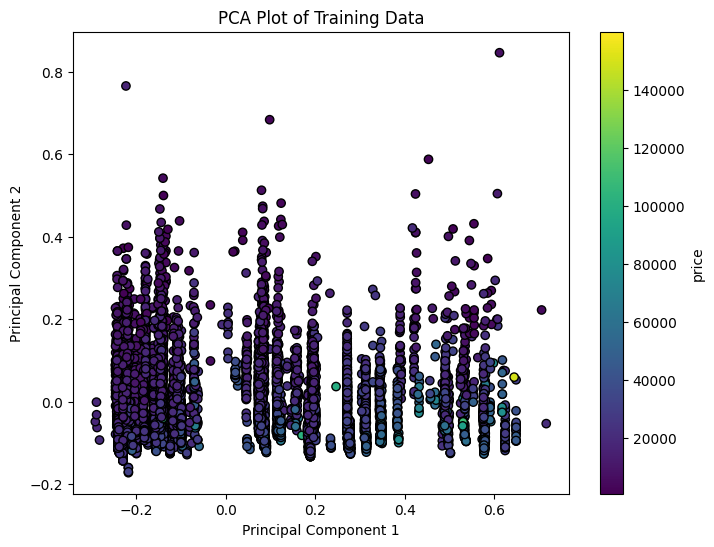

In [69]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# normalisasi
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore

# Min-max normalization
scaler = MinMaxScaler()
x_train_normalized = scaler.fit_transform(x_train)
x_test_normalized = scaler.transform(x_test)

# PCA
pca = PCA(n_components=5)  # Ubah jumlah komponen sesuai kebutuhan
X_train_pca = pca.fit_transform(x_train_normalized)
X_test_pca = pca.transform(x_test_normalized)

plt.figure(figsize=(8, 6))

# Scatter plot untuk dua komponen pertama
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', edgecolor='k')
plt.title('PCA Plot of Training Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='price')

plt.show()

In [70]:
# modelling
rf_regressor = RandomForestRegressor(n_estimators=200, random_state=42)
rf_regressor.fit(X_train_pca, y_train)
y_pred = rf_regressor.predict(X_test_pca)


In [71]:
# evalualisasi
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 9377421.451200405
R-squared: 0.9399412364274323


Feature Importances:
model: 0.1861350912692852
year: 0.32894056503949115
mileage: 0.38531794220496834
mpg: 0.06887571352931061
engineSize: 0.03073068795694456


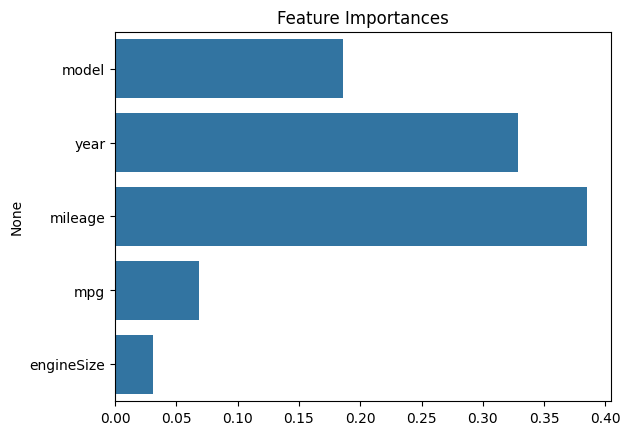

In [72]:
feature_importances = rf_regressor.feature_importances_
print('Feature Importances:')
for feature, importance in zip(x.columns, feature_importances):
    print(f'{feature}: {importance}')

# You can also visualize feature importances
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x=feature_importances, y=x.columns)
plt.title('Feature Importances')
plt.show()

MEMBUAT INPUT MODEL REGRESI LINIER

In [68]:
# save model supaya bisa dipanggil di web
filename = 'estimasi_mobil.sav'
pickle.dump(rf_regressor, open(filename, 'wb'))